# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

In [26]:
import sympy as sym
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from scipy.integrate import odeint

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$

$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$

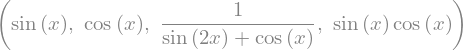

In [29]:
# Declaramos todos los símbolos y funciones
x = sym.Symbol('x')
y = sym.Function('y')
z = sym.Function('z')
w = sym.Function('w')
g = sym.Function('g')
y = sym.sin(x)
z = sym.cos(x)
w = 1/(sym.cos(x) + sym.sin(2*x))
g = y * z

y, z, w, g

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

In [30]:
# Differenciamos
g_ = sym.diff(g, x)
g_

(c) Grafica $w(x)$ en el rango $[0,1]$

Text(0, 0.5, 'w(x)')

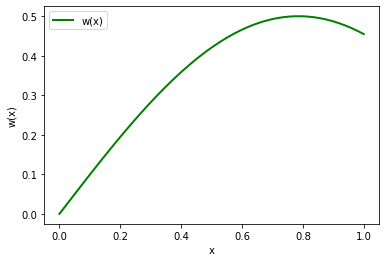

In [6]:
# Creamos arreglo para eje x
Xd = np.linspace(0,1)

# Creamos arreglo para eje y
Wd = []
for n in Xd:
    Wd.append(g.subs(x,n))
    
# Graficamos
plt.plot(Xd, Wd, color="green", linewidth=2, linestyle="-", label="w(x)")
plt.legend(loc='upper left')
plt.xlabel("x")
plt.ylabel("w(x)")

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

In [7]:
# Integramos
G = sym.integrate(g, x)
G

sin(x)**2/2

In [8]:
# Evaluamos la integral
Geval = sym.integrate(g, (x, 0, 1))
Geval.doit()

sin(1)**2/2

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

In [9]:
# Evaluamos los limites dados
ylim = sym.limit(y, x, 0)
zlim = sym.limit(z, x, 0)
glim = sym.limit(g, x, 0)
wlim = sym.limit(w, x, 0)

ylim, zlim, glim, wlim

(0, 1, 0, 1)

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [10]:
# Creamos otro símbolo
i = sym.Symbol('i')

# Creamos las series pedidas
yseries = sym.Sum((-1)**i * x**(2*i + 1) / factorial(2*i+1),(i,0,2))
zseries = sym.Sum((-1)**i * x**(2*i) / factorial(2*i),(i,0,2))
yseries, zseries

(Sum((-1)**i*x**(2*i + 1)/factorial(2*i + 1), (i, 0, 2)),
 Sum((-1)**i*x**(2*i)/factorial(2*i), (i, 0, 2)))

In [11]:
yseries.doit(), zseries.doit()

(x**5/120 - x**3/6 + x, x**4/24 - x**2/2 + 1)

<div class="alert alert-info">
**NOTA** Muestra las expresiones en cada inciso.
</div>

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

In [12]:
# Utilizo función Runge-Kutta dada en clase
def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next

# Constrúyo mi modelo del atractor
def atractor_Rossler(estado, tiempo):
    g0 = -estado[1] - estado[2]
    g1 = estado[0] + 0.13*estado[1]
    g2 = 0.2 + estado[2]*(estado[0]-6.5)
    
    return np.array([g0, g1, g2])

def RK2_solve(num_steps, t_i, t_f):
    return 0

In [13]:
# Estado Inicial
y = np.zeros([3])
time = np.linspace(0,150, 1000)

In [14]:
# Solve (Use odeint, no pude utilizar RK2)
solution = odeint(func=atractor_Rossler, y0 = y, t = time)

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

Text(0, 0.5, 'x, y, z')

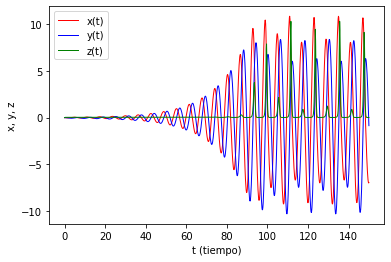

In [15]:
# Usamos slicing a través de las columnas
X_2 = solution[:, 0]
Y_2 = solution[:, 1]
Z_2 = solution[:, 2]

# Ploteamos
plt.plot(time, X_2, color="red", linewidth=1, linestyle="-", label="x(t)")
plt.plot(time, Y_2, color="blue", linewidth=1, linestyle="-", label="y(t)")
plt.plot(time, Z_2, color="green", linewidth=1, linestyle="-", label="z(t)")
plt.legend(loc='upper left')
plt.xlabel("t (tiempo)")
plt.ylabel("x, y, z")

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

In [16]:
from mpl_toolkits.mplot3d import Axes3D

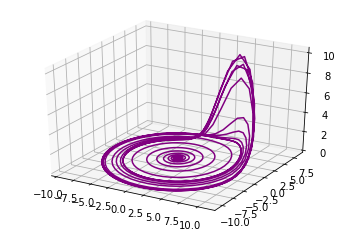

In [17]:
# Plot 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(X_2, Y_2, Z_2, color="purple")